# Notebook for delivering of the Airgo project

*This Jupyter Notebook is part of a project that has received funding from the European Union’s Horizon 2020 research and innovation programme under grant agreement No 101016508.*

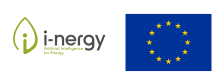

In [1]:
from IPython import display
display.Image("../logos/i-nergy_logo.png")

### Imports

In [2]:
import grid2op
from grid2op.Agent import TopologyGreedy, RecoPowerlineAgent, OneChangeThenNothing
from grid2op.Runner import Runner
from grid2op.Reward import L2RPNReward

import os
import sys
from pathlib import Path

sys.path.insert(0, '../')

from pypowsybl_grid2opbackend.Backend.powsybl_backend import PowsyblBackend

C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\grid2op\Backend\pandaPowerBackend.py:30: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\Scripts\python.exe -m pip install numba

  warnings.warn(


### Paths to the data

In [6]:
path = Path(os.getcwd())
root_path = path.parent.absolute()
ieee1888_path = os.path.join(root_path,"case1888rte")

### Evaluation function

In [7]:
from l2rpn_baselines.utils import save_log_gif 

def evaluate(env,
             grid2op_agent,
             nb_episode=1,
             nb_process=1,
             max_steps=-1,
             verbose=False,
             save_gif=False,
             logs_path=os.path.join(root_path,"logs")):
    
    if nb_episode == 0:
        return grid2op_agent, []

    # Build runner
    runner_params = env.get_params_for_runner()
    runner_params["verbose"] = verbose
    runner = Runner(**runner_params,
                    agentClass=None,
                    agentInstance=grid2op_agent)
    
    # Run the agent on the scenarios
    if logs_path is not None:
        os.makedirs(logs_path, exist_ok=True)

    res = runner.run(path_save=logs_path,
                     nb_episode=nb_episode,
                     nb_process=nb_process,
                     max_iter=max_steps,
                     pbar=verbose,
                     )

    # Print summary
    if verbose:
        print("Evaluation summary:")
        for _, chron_name, cum_reward, nb_time_step, max_ts in res:
            msg_tmp = "chronics at: {}".format(chron_name)
            msg_tmp += "\ttotal score: {:.6f}".format(cum_reward)
            msg_tmp += "\ttime steps: {:.0f}/{:.0f}".format(nb_time_step, max_ts)
            print(msg_tmp)

    if save_gif:
        if verbose:
            print("Saving the gif of the episodes")
        save_log_gif(logs_path, res)

### Loading environment

In [8]:
env = grid2op.make(
        ieee1888_path,
        reward_class = L2RPNReward,
        backend = PowsyblBackend(detailed_infos_for_cascading_failures=False)
    )

C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\grid2op\MakeEnv\MakeFromPath.py:317: UserWarning: Impossible to load the coordinate of the substation with error: "Grid2OpException EnvError "Cannot find D:\Projets\AIRGo\OfficialRepo\pypowsybl-grid2opbackend\case1888rte\grid_layout.json. Dataset grid layout"". Expect some issue if you attempt to plot the grid.
  warnings.warn(
C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\grid2op\MakeEnv\MakeFromPath.py:347: UserWarning: Dataset D:\Projets\AIRGo\OfficialRepo\pypowsybl-grid2opbackend\case1888rte\config.py doesn't have a valid graph layout. Expect some failures when attempting to plot the grid. Error was: [Errno 2] No such file or directory: 'D:\\Projets\\AIRGo\\OfficialRepo\\pypowsybl-grid2opbackend\\case1888rte\\grid_layout.json'
  warnings.warn(
gen vm_pu < bus min_vm_pu for gens [ 58  82  87 182 214 246 264 265]. Sett

### Agent initialization

In [9]:
acts_dict = {
    "set_bus": {
        "lines_or_id": [(3,2),(4,2)],
        "loads_id": [(0,2)],
        "generators_id": [(1,2)]
    }
}

one_change_then_nothing = OneChangeThenNothing(env.action_space)
one_change_then_nothing.gen_next(acts_dict)

grid2op.Agent.oneChangeThenNothing.OneChangeThenNothing

### Evaluation of an agent

In [10]:
evaluate(
    env,
    one_change_then_nothing,
    verbose=True,
    nb_episode=4,
    max_steps=50,
)

episode:   0%|                                                                                                                                                        | 0/4 [00:00<?, ?it/s]gen vm_pu < bus min_vm_pu for gens [ 58  82  87 182 214 246 264 265]. Setting bus limit for these gens.
C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')

episode:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 38/50 [00:18<00:05,  2.22it/s]


episode:  25%|████████████████████████████████████                                                                                                            | 1/4 [00:37<01:52, 37.57s/it]gen vm_pu < bus min_vm_pu for gens [ 58  82  87 182 214 246 264 265]. Setting bus limit for these gens.
C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')

episode:  54%|████████████████████████████████████████████████████████████████████████████▋                                                                 | 27/50 [00:12<00:10,  2.22it/s]


episode:  50%|████████████████████████████████████████████████████████████████████████                                                                        | 2/4 [01:11<01:11, 35.51s/it]gen vm_pu < bus min_vm_pu for gens [ 58  82  87 182 214 246 264 265]. Setting bus limit for these gens.
C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')

episode:  30%|██████████████████████████████████████████▌                                                                                                   | 15/50 [00:06<00:14,  2.40it/s]


episode:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 3/4 [01:44<00:34, 34.30s/it]gen vm_pu < bus min_vm_pu for gens [ 58  82  87 182 214 246 264 265]. Setting bus limit for these gens.
C:\Users\rtschupp\AppData\Local\pypoetry\Cache\virtualenvs\pypowsybltest-3L0u-b9v-py3.10\lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')

episode:   6%|████████▌                                                                                                                                      | 3/50 [00:01<00:26,  1.75it/s]


episode:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 45/50 [00:20<00:02,  2.13it/s]


episode: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:19<00:00, 34.87s/it]

Evaluation summary:
chronics at: 2012-01-01	total score: 87017.734375	time steps: 49/50
chronics at: 2012-01-08	total score: 88921.539062	time steps: 50/50
chronics at: 2012-01-15	total score: 88922.554688	time steps: 50/50
chronics at: 2012-01-22	total score: 88923.101562	time steps: 50/50
